Question:
    
In driver_data.csvPreview the document, you are given a dataset of delivery fleet driver data.
For each driver we have two features: mean distance driven per day and the mean percentage of time a driver was >5 mph 
over the speed limit.

Run the K-Means algorithm on this dataset and find the optimal number of clusters. 

What insights can you gather from these clusters?

Perform Agglomerative clustering on the same dataset with an appropriate number of clusters. Plot the dendrogram.

Compare the results from your K-Means model and your Hierarchical clustering model using silhouette scores. 
Which model is superior?

Document your work and explain your reasoning.

In [67]:
#Set the working directory.
import os
os.chdir('C://Users//Admin')
os.getcwd()

'C:\\Users\\Admin'

In [68]:
# Import pandas and numpy libraries.
import pandas as pd
import numpy as np
from pandas import DataFrame

In [69]:
# Read the input dataset and store the details in 2 different data frames(one for Kmeans and another for hierarchial).
file = pd.read_csv('driver_data.csv')
file2 = pd.read_csv('driver_data.csv')
file.head()

,Distance_Feature,Speeding_Feature
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


In [70]:
# Apply feature scaling, using standardisation process.
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit(file)
file_scaled = std_scale.transform(file)
print(file_scaled[:5,])

[[-0.0898104   1.26061251]
 [-0.43977285  1.04174351]
 [-0.215131    1.18765617]
 [-0.38066642  0.8228745 ]
 [-0.40142849  1.04174351]]


In [71]:
#Run multiple iteration of KMeans algorithm to find an optimal number of clusters using elbow method.
from sklearn.cluster import KMeans
ssq = []

for K in range(1,11):
    kmeans_model = KMeans(n_clusters=K, random_state=123)
    kmeans_model.fit(file_scaled)
    ssq.append(kmeans_model.inertia_)

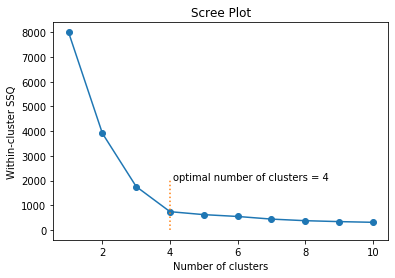

In [72]:
# Generate Scree plot.
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1,11), ssq, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster SSQ")
plt.title("Scree Plot")
plt.plot([4]*2000, range(1,2001), ":")
plt.text(4.1, 2001, "optimal number of clusters = 4")
plt.show()

In [73]:
# From the result we see that three should be the optimal number of clusters for the given data.
# Let's fit the model again with K=4
km = KMeans(n_clusters=4, random_state=123)
km.fit(file_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [74]:
# Make predicted cluster for given dataset.
predicted_cluster = km.predict(file_scaled)
predicted_cluster[:10]

array([3, 3, 3, 3, 3, 0, 3, 0, 3, 3])

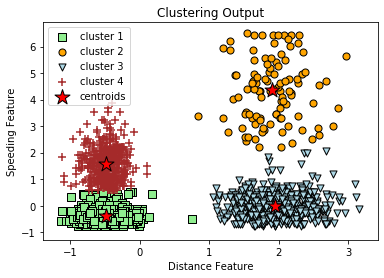

In [75]:
# Plot the data partitioned into clusters.
plt.scatter(file_scaled[predicted_cluster==0,0], file_scaled[predicted_cluster==0, 1], s=50, c='lightgreen',\
           marker='s', edgecolors='black', label='cluster 1')
plt.scatter(file_scaled[predicted_cluster==1,0], file_scaled[predicted_cluster==1, 1], s=50, c='orange',\
           marker='o', edgecolors='black', label='cluster 2')
plt.scatter(file_scaled[predicted_cluster==2,0], file_scaled[predicted_cluster==2, 1], s=50, c='lightblue',\
           marker='v', edgecolors='black', label='cluster 3')
plt.scatter(file_scaled[predicted_cluster==3,0], file_scaled[predicted_cluster==3, 1], s=50, c='brown',\
           marker='+', edgecolors='black', label='cluster 4')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, c='red',\
           marker='*', edgecolors='black', label='centroids')
plt.legend(scatterpoints=1)
plt.xlabel("Distance Feature")
plt.ylabel("Speeding Feature")
plt.title("Clustering Output")
plt.show()

Interpreting Clustering output requires domain knowledge. For example, we could interpret the three clusters seen above as (From left to right):

Cluster 3: Drivers, who drives more distance with very low speed.

Cluster 1: Drivers, who drives less distance with very low speed.

Cluster 2: Drivers, who drives More distance with very high speed.

Cluster 4: Drivers, who drives less distance with very high speed.
    
Accordingly, an analyst may conclude following labels for each cluster:

Cluster 1: Driving Learner.

Cluster 2: Driving Expert.

Cluster 3: Safe Driver.

Cluster 4: Amateur Driver.

We can insert these labels back into our dataset.

In [76]:
predictions_relabelled = np.where(predicted_cluster==0, "Driving Learner", np.where(predicted_cluster==1,\
                                                                                    "Driving Expert", \
                                                                                  np.where(predicted_cluster==2,
                                                                                    "Safe Driver", \
                                                                                           "Amateur Driver")))
file['Category'] = pd.Series(predictions_relabelled, index=file.index)
file.head(10)

,Distance_Feature,Speeding_Feature,Category
0,71.24,28,Amateur Driver
1,52.53,25,Amateur Driver
2,64.54,27,Amateur Driver
3,55.69,22,Amateur Driver
4,54.58,25,Amateur Driver
5,41.91,10,Driving Learner
6,58.64,20,Amateur Driver
7,52.02,8,Driving Learner
8,31.25,34,Amateur Driver
9,44.31,19,Amateur Driver


In [77]:
# Now let's start with Hierarchial Clustering.
#Using Scipy we will first create dendrogram for this dataset.
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
# Apply feature scaling, using standardisation process.
from sklearn.preprocessing import StandardScaler
std_scale2 = StandardScaler().fit(file2)
file2_scaled = std_scale2.transform(file2)
print(file2_scaled[:5,])

[[-0.0898104   1.26061251]
 [-0.43977285  1.04174351]
 [-0.215131    1.18765617]
 [-0.38066642  0.8228745 ]
 [-0.40142849  1.04174351]]


In [79]:
from scipy.cluster.hierarchy import set_link_color_palette
set_link_color_palette(['black'])

In [80]:
# Use Euclidean distance in linkage method, with ward type.
link = linkage(file2_scaled, method='ward', metric='euclidean')

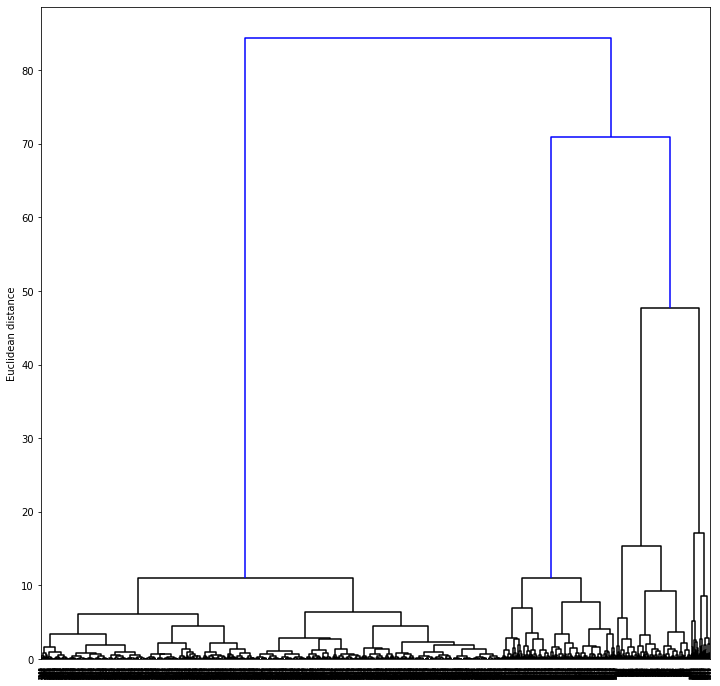

In [81]:
# Plot a Dendrogram.
plt.figure(figsize=(12,12))
dnd = dendrogram(link)
plt.ylabel("Euclidean distance")
plt.show()
# We are using Threshold value as 50(as dissimilarity is more above this point)
# Hence from diagram, we can have four clusters, pertaining to it.

In [82]:
# Do a Hierarchical clustering with number of clusters as 4.
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4)

In [83]:
# Fit the model.
model.fit(file2_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4,
                        pooling_func='deprecated')

In [84]:
# get the array of clustering point for different observations in the dataset.
model.labels_

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

In [85]:
# Get the silhouette score of Hierarchical clustering output.
from sklearn.metrics import silhouette_score
silhouette_score(file2_scaled, model.labels_)

0.77889704091338

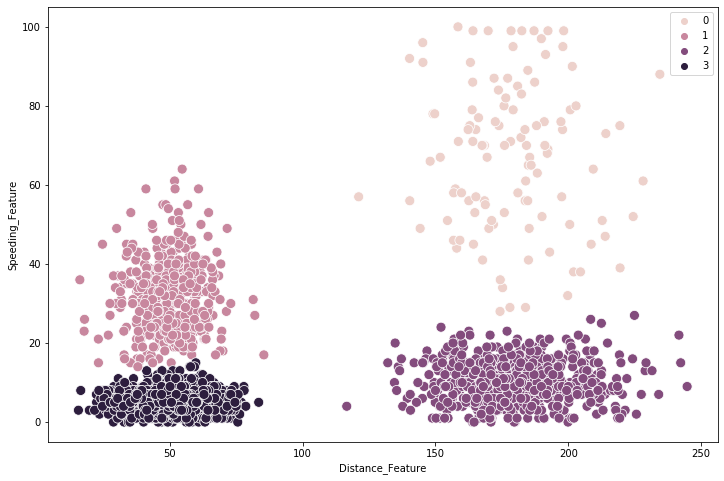

In [86]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.scatterplot(x='Distance_Feature', y='Speeding_Feature', data=file2, hue=model.labels_, s=100)
plt.show()

In [87]:
# Get the silhouette score of K-means clustering output.
silhouette_score(file_scaled, predicted_cluster)

# If you notice, Silhouette score of Kmeans clustering is slightly more than that from Hierarchical clustering. Hence,
# Kmeans clustering is slightly better than agglomerative clustering, for this dataset.

0.7843727073779401

Conclusion: K-means Clustering is little better than Agglomerative(Hierarchical) Clustering for this Dataset.